In [1]:
from sympy import *
init_printing # facilita la impresión de las expresiones matemáticas

<function sympy.interactive.printing.init_printing(pretty_print=True, order=None, use_unicode=None, use_latex=None, wrap_line=None, num_columns=None, no_global=False, ip=None, euler=False, forecolor=None, backcolor='Transparent', fontsize='10pt', latex_mode='plain', print_builtin=True, str_printer=None, pretty_printer=None, latex_printer=None, scale=1.0, **settings)>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Balance de materia en estado no estacionario

## <font style="color:red">Ejemplo 1</font>

<img src="BMNE1.png" alt="Balance de materia en estado no estacionario">

$
Q_e = Q_s = Q
$

$
V \frac{dC}{dt} = Q (C_e - C_s)
$

$
(C_e - C_s) = y
$ <br>
$
(C_s - C_e) = -y
$ <br>
$
- \frac{dC}{dt} = - \frac{dy}{dt}
$ <br>

$
 \frac{dC}{dt} =  \frac{dy}{dt}
$

$
\frac{dy}{dt} = -\frac{Q}{V} y
$<br>

$
\int_{y_0}^{y_t} \frac{1}{y} dy= -\frac{Q}{V} \int_{t_0}^{t} dt
$<br>

$
ln \left( \frac{y_t}{y_0} \right)= -\frac{Q}{V} (t-t_0)
$ <br>

$
ln \left( \frac{C_t - C_e}{C_0 - C_e} \right)= -\frac{Q}{V} (t-t_0)
$ <br>

$
\frac{C_t - C_e}{C_0 - C_e} = e^{-\frac{Q}{V} (t-t_0)}
$ <br>

$
{C_t } = ({C_0 - C_e}) e^{-\frac{Q}{V} (t-t_0)} + C_e
$ <br>

### <font style="color:green"> Representación con sympy</font>

In [3]:
V = 1 # en m3
Q = 1.1 # en m3/d
t = symbols("t")
C = Function("C")
Ce = 0.1 # g/d

In [4]:
eq1 = Eq(V*C(t).diff(t,1), Q*(Ce-C(t)))

In [5]:
eq1

Eq(Derivative(C(t), t), 0.11 - 1.1*C(t))

In [6]:
ci1 = {C(0):0} #C0 es de 0 g/m3

In [7]:
solucion1 = dsolve(eq1, C(t),ics=ci1)  #En este primer caso C0 se asume como 0 g/m3

In [8]:
solucion1 

Eq(C(t), 0.1 - 0.1*exp(-1.1*t))

<a href="https://www.tutorialspoint.com/sympy/sympy_plotting.htm">graficos sympy</a> <br>

<a href="https://www.cfm.brown.edu/people/dobrush/am33/SymPy/part1.html">graficos sympy 2</a> 

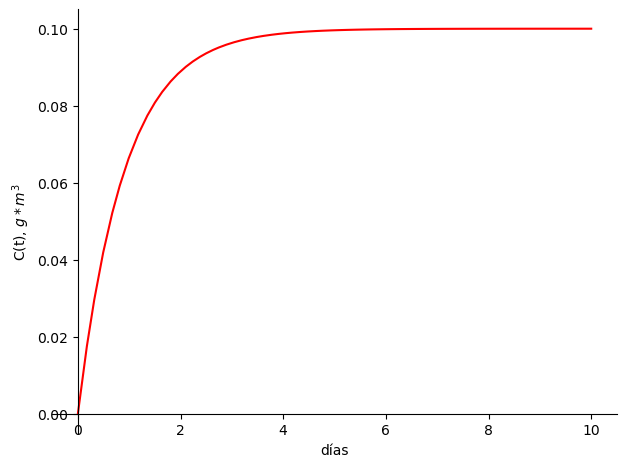

In [9]:
plot(solucion1.rhs, (t,0,10),  line_color="red", ylabel="C(t), $g*m^3$", xlabel ="días")

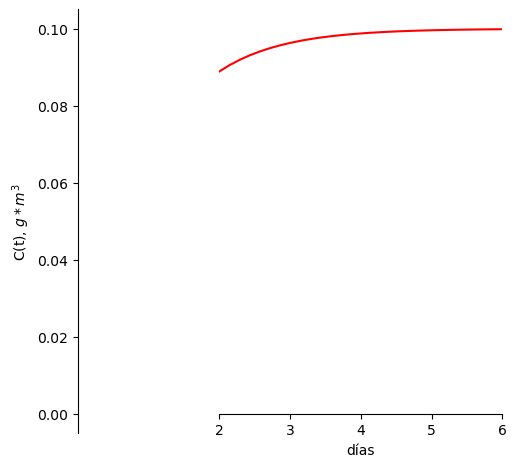

In [10]:
plot(solucion1.rhs, (t,0,10), xlim=(2,6), line_color="red", ylabel="C(t), $g*m^3$", xlabel ="días")

In [11]:
# Analicemos las concentraciones dentro del recipiente en los primeros 20 días
for i in range(11): 
    display(solucion1.subs(t,i).evalf())

Eq(C(0), 0)

Eq(C(1), 0.0667128916301921)

Eq(C(2), 0.0889196841637666)

Eq(C(3), 0.096311683259876)

Eq(C(4), 0.0987722660096932)

Eq(C(5), 0.0995913228561536)

Eq(C(6), 0.0998639631962452)

Eq(C(7), 0.0999547172817113)

Eq(C(8), 0.0999849266924905)

Eq(C(9), 0.0999949825317944)

Eq(C(10), 0.099998329829921)

## <font style="color:red">Ejemplo 2</font>

<img src="BMNE2.png" alt="Balance de materia en estado no estacionario">

### <font style="color:green"> Vamos a representarlo con sympy basandonos en el caso anterior</font>

In [12]:
ci2 = {C(0):0.05} #C0 es de 0.05 g/m3

In [13]:
solucion2 = dsolve(eq1, C(t),ics=ci2)  #En este primer caso C0 se asume como 0.05 g/m3

In [14]:
solucion2

Eq(C(t), 0.1 - 0.05*exp(-1.1*t))

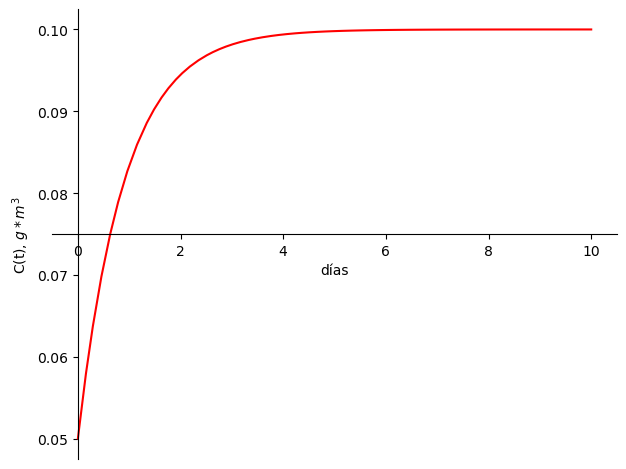

In [15]:
plot(solucion2.rhs, (t,0,10),line_color="red", ylabel="C(t), $g*m^3$", xlabel ="días")

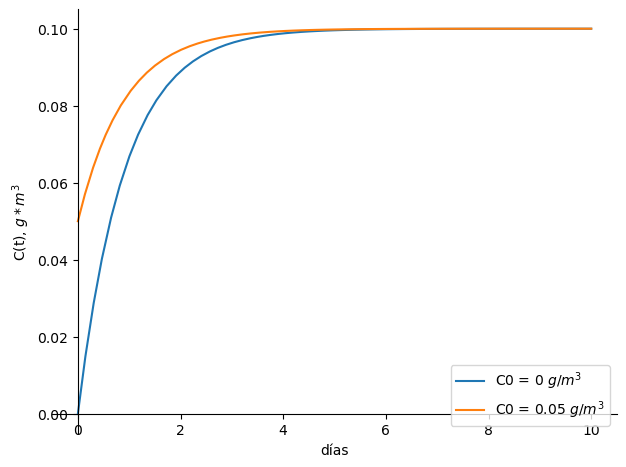

In [16]:
p1 = plot(solucion1.rhs ,(t,0,10), ylabel="C(t), $g*m^3$", xlabel ="días", legend=True, show=False)
p2 = plot(solucion2.rhs,  (t,0,10), ylabel="C(t), $g*m^3$", xlabel ="días", legend=True , show=False)

p1[0].label = 'C0 = 0 $g/m^3$'
p2[0].label = 'C0 = 0.05 $g/m^3$'

p1.append(p2[0])

p1.show()

## <font style="color:red">Ejemplo 3</font>

<img src="BMNE3.png" alt="Balance de materia en estado no estacionario">

In [17]:
ci3 = {C(0):1} #C0 es de 1 g/m3

In [18]:
solucion3 = dsolve(eq1, C(t),ics=ci3)  #En este primer caso C0 se asume como 1 g/m3

In [19]:
solucion3

Eq(C(t), 0.1 + 0.9*exp(-1.1*t))

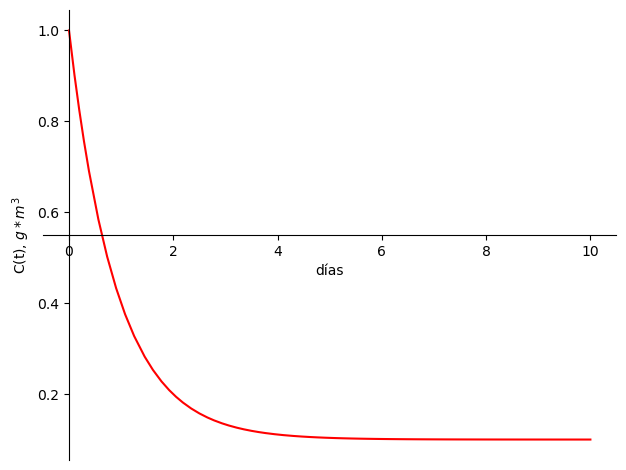

In [20]:
plot(solucion3.rhs, (t,0,10),line_color="red", ylabel="C(t), $g*m^3$", xlabel ="días")

## <font style="color:red">Ejemplo 4</font>

<img src="BMNE4.png" alt="Balance de materia en estado no estacionario">

In [21]:
V = 1 # en m3
Q = 0.1+0.3# en m3/d
t = symbols("t")
C = Function("C")
Ce = 0.1 + 0.4 # g/d

In [22]:
eq4 = Eq(V*C(t).diff(t,1), Q*(Ce-C(t)))
eq4

Eq(Derivative(C(t), t), 0.2 - 0.4*C(t))

In [23]:
ci4 = {C(0):0.2} #C0 es de 0.2 g/m3

In [24]:
solucion4 = dsolve(eq4, C(t),ics=ci4)
solucion4

Eq(C(t), 0.5 - 0.3*exp(-0.4*t))

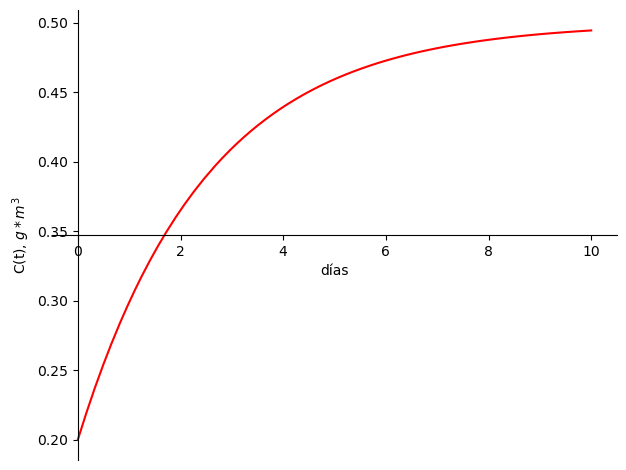

In [25]:
plot(solucion4.rhs, (t,0,10),line_color="red", ylabel="C(t), $g*m^3$", xlabel ="días")

## <font style="color:red">EJERCICIO</font>

<img src="BMNE5.png" alt="Balance de materia en estado no estacionario">

In [26]:
v = Function('v')(symbols('t'))
c = Function('c')(symbols('t'))

In [27]:
cEntrada = 0.1
qEntrada = 0.5
qSalida = 0.1

In [28]:
v.diff()

Derivative(v(t), t)

In [29]:
Ecuacion = Eq(1*v.diff() + 0.1*c.diff(),cEntrada*qEntrada - c*qSalida)

In [30]:
Ecuacion

Eq(0.1*Derivative(c(t), t) + Derivative(v(t), t), 0.05 - 0.1*c(t))